# Prediction of septic_shock patients admitted in ICU (Intensive Care Unit)

Sepsis is a serious condition in which the body responds improperly to an infection. 
The infection-fighting processes turn on the body, causing the organs to work poorly. 
Sepsis may progress to septic shock. This is a dramatic drop in blood pressure that 
can damage the lungs, kidneys, liver and other organs. When the damage is severe, 
it can lead to mortality.


Sepsis can progress to septic shock when certain changes in the circulatory system, 
the body's cells and how the body uses energy become more abnormal. 
Septic shock is more likely to cause death than sepsis is. 


Sepsis is a clinical syndrome of life-threatening organ dysfunction caused by 
a dysregulated response to infection. In septic shock, there is critical reduction 
in tissue perfusion; acute failure of multiple organs, including the lungs, kidneys, 
and liver, can occur.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [6]:
pd.set_option("display.max_columns", 200)

In [7]:
data = pd.read_csv("sepsis_status.csv")
dictionary = pd.read_csv("Parameter _detail_Dictionary.csv")


In [8]:
def select_category(df, category):
    return df[df.Category == category]

In [9]:
icu_df = data.copy()
icu_df.head()

,encounter_id,patient_id,hospital_id,septic_shock,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_sepsis_prob,apache_4a_icu_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [10]:
icu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [11]:
icu_df['septic_shock'].value_counts()

septic_shock
0    83798
1     7915
Name: count, dtype: int64

In [12]:
icu_df['septic_shock'].value_counts(normalize=True)

septic_shock
0    0.913698
1    0.086302
Name: proportion, dtype: float64

In [13]:
dictionary

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,NaN,integer,Unique identifier associated with a patient un...,NaN
1,identifier,hospital_id,NaN,integer,Unique identifier associated with a hospital,NaN
2,identifier,patient_id,NaN,integer,Unique identifier associated with a patient,NaN
3,demographic,Sepsis_status,NaN,binary,Whether the patient having sepsis during this ...,0
4,demographic,age,Years,numeric,The age of the patient on unit admission,NaN
...,...,...,...,...,...,...
183,APACHE comorbidity,lymphoma,NaN,binary,Whether the patient has been diagnosed with no...,1
184,APACHE comorbidity,solid_tumor_with_metastasis,NaN,binary,Whether the patient has been diagnosed with an...,1
185,APACHE grouping,apache_3j_bodysystem,NaN,string,Admission diagnosis group for APACHE III,Cardiovascular
186,APACHE grouping,apache_2_bodysystem,NaN,string,Admission diagnosis group for APACHE II,Respiratory


In [14]:
def select_category(df, category):
    return df[df.Category==category]

In [15]:
cols= select_category(dictionary, "GOSSIS example prediction")
cols

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
187,GOSSIS example prediction,pred,NaN,numeric,"Example mortality prediction, shared as a 'bas...",0.000921


In [16]:
cols=select_category(dictionary,"APACHE grouping")
cols

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
185,APACHE grouping,apache_3j_bodysystem,NaN,string,Admission diagnosis group for APACHE III,Cardiovascular
186,APACHE grouping,apache_2_bodysystem,NaN,string,Admission diagnosis group for APACHE II,Respiratory


In [17]:
# Preprocessing - First step is finding missing value

In [18]:
icu_df.isnull().sum()

encounter_id                      0
patient_id                        0
hospital_id                       0
septic_shock                      0
age                            4228
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 186, dtype: int64

In [19]:
pd.set_option("display.max_rows", 200)

In [20]:
icu_df.isnull().sum().sort_values(ascending=False)

h1_bilirubin_min                  84619
h1_bilirubin_max                  84619
h1_lactate_max                    84369
h1_lactate_min                    84369
h1_albumin_max                    83824
h1_albumin_min                    83824
h1_pao2fio2ratio_min              80195
h1_pao2fio2ratio_max              80195
h1_arterial_ph_max                76424
h1_arterial_ph_min                76424
h1_hco3_max                       76094
h1_hco3_min                       76094
h1_arterial_pco2_min              75959
h1_arterial_pco2_max              75959
h1_wbc_max                        75953
h1_wbc_min                        75953
h1_arterial_po2_max               75945
h1_arterial_po2_min               75945
h1_calcium_max                    75863
h1_calcium_min                    75863
h1_platelets_max                  75673
h1_platelets_min                  75673
h1_bun_max                        75091
h1_bun_min                        75091
h1_creatinine_max                 74957


In [21]:
high_null= icu_df.isnull().mean()
high_null.sort_values(ascending=False)

h1_bilirubin_min                  0.922650
h1_bilirubin_max                  0.922650
h1_lactate_max                    0.919924
h1_lactate_min                    0.919924
h1_albumin_max                    0.913982
h1_albumin_min                    0.913982
h1_pao2fio2ratio_min              0.874413
h1_pao2fio2ratio_max              0.874413
h1_arterial_ph_max                0.833295
h1_arterial_ph_min                0.833295
h1_hco3_max                       0.829697
h1_hco3_min                       0.829697
h1_arterial_pco2_min              0.828225
h1_arterial_pco2_max              0.828225
h1_wbc_max                        0.828160
h1_wbc_min                        0.828160
h1_arterial_po2_max               0.828072
h1_arterial_po2_min               0.828072
h1_calcium_max                    0.827178
h1_calcium_min                    0.827178
h1_platelets_max                  0.825107
h1_platelets_min                  0.825107
h1_bun_max                        0.818761
h1_bun_min 

In [22]:
high_null= icu_df.isnull().sum()/len(icu_df)
high_null.sort_values(ascending=False)

h1_bilirubin_min                  0.922650
h1_bilirubin_max                  0.922650
h1_lactate_max                    0.919924
h1_lactate_min                    0.919924
h1_albumin_max                    0.913982
h1_albumin_min                    0.913982
h1_pao2fio2ratio_min              0.874413
h1_pao2fio2ratio_max              0.874413
h1_arterial_ph_max                0.833295
h1_arterial_ph_min                0.833295
h1_hco3_max                       0.829697
h1_hco3_min                       0.829697
h1_arterial_pco2_min              0.828225
h1_arterial_pco2_max              0.828225
h1_wbc_max                        0.828160
h1_wbc_min                        0.828160
h1_arterial_po2_max               0.828072
h1_arterial_po2_min               0.828072
h1_calcium_max                    0.827178
h1_calcium_min                    0.827178
h1_platelets_max                  0.825107
h1_platelets_min                  0.825107
h1_bun_max                        0.818761
h1_bun_min 

In [23]:
# We have mainly two categories of missing value 
# more than 50% and less than 25%
high_missing= high_null[high_null>0.50].index
high_missing

Index(['albumin_apache', 'bilirubin_apache', 'fio2_apache', 'paco2_apache',
       'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'urineoutput_apache',
       'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min',
       'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_sysbp_invasive_max',
       'd1_sysbp_invasive_min', 'h1_diasbp_invasive_max',
       'h1_diasbp_invasive_min', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min',
       'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'd1_albumin_max',
       'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_inr_max',
       'd1_inr_min', 'd1_lactate_max', 'd1_lactate_min', 'h1_albumin_max',
       'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max',
       'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max',
       'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max',
       'h1_hco3_min', 'h1_hemaglobin_max', 'h1_hemaglobin_min',
       'h1_hematocrit_max', 'h1_hematocri

In [24]:
len(high_missing)
# Drop the values having more than 50% missing values

74

In [25]:
icu_df_final= icu_df.drop(high_missing, axis=1)
icu_df_final.shape

(91713, 112)

In [26]:
icu_df_final = icu_df_final.dropna()
icu_df_final.shape

(27795, 112)

In [27]:
icu_df_final.isnull().sum()

encounter_id                      0
patient_id                        0
hospital_id                       0
septic_shock                      0
age                               0
bmi                               0
elective_surgery                  0
ethnicity                         0
gender                            0
height                            0
hospital_admit_source             0
icu_admit_source                  0
icu_id                            0
icu_stay_type                     0
icu_type                          0
pre_icu_los_days                  0
readmission_status                0
weight                            0
apache_2_diagnosis                0
apache_3j_diagnosis               0
apache_post_operative             0
arf_apache                        0
bun_apache                        0
creatinine_apache                 0
gcs_eyes_apache                   0
gcs_motor_apache                  0
gcs_unable_apache                 0
gcs_verbal_apache           

In [28]:
# lets drop some columns which is having no significance as per our basic understanding
cols_to_drop=["encounter_id","patient_id","hospital_admit_source","icu_admit_source","icu_id","icu_stay_type"]
icu_df_final= icu_df_final.drop(cols_to_drop, axis=1)
icu_df_final.shape

(27795, 106)

In [29]:
icu_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27795 entries, 0 to 91709
Columns: 106 entries, hospital_id to apache_2_bodysystem
dtypes: float64(96), int64(5), object(5)
memory usage: 22.7+ MB


In [30]:
object_columns= icu_df_final.select_dtypes(include=object).columns
object_columns

Index(['ethnicity', 'gender', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')

In [31]:
df= pd.get_dummies(icu_df_final, columns=object_columns, drop_first=True)
df.head()

,hospital_id,septic_shock,age,bmi,elective_surgery,height,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_sepsis_prob,apache_4a_icu_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,118,0,68.0,22.730000,0,180.3,0.541667,0,73.9,113.0,502.01,0,0.0,31.0,2.51,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,36.0,134.0,39.3,0.0,14.1,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,39.5,37.5,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,81,0,77.0,27.420000,0,160.0,0.927778,0,70.2,108.0,203.01,0,0.0,9.0,0.56,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,33.0,145.0,35.1,1.0,12.7,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,36.3,36.3,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
5,83,0,67.0,27.560000,0,190.5,0.000694,0,100.0,301.0,403.01,0,0.0,13.0,0.71,4.0,6.0,0.0,5.0,156.0,113.0,44.2,0.0,130.0,35.0,137.0,36.6

In [32]:
df.shape

(27795, 133)

In [33]:
x= df.drop("septic_shock",axis=1)
y= df['septic_shock']
y.value_counts()

septic_shock
0    25259
1     2536
Name: count, dtype: int64

In [34]:
y.value_counts(normalize=True)

septic_shock
0    0.908761
1    0.091239
Name: proportion, dtype: float64

In [35]:
#  We must check if any column has only one variable/ no varience column
# finding the unique variable columns
one_unique= x.apply(pd.Series.nunique)
one_unique

hospital_id                                    119
age                                             74
bmi                                          16993
elective_surgery                                 2
height                                         271
pre_icu_los_days                              4637
readmission_status                               1
weight                                        2447
apache_2_diagnosis                              44
apache_3j_diagnosis                            363
apache_post_operative                            2
arf_apache                                       2
bun_apache                                     195
creatinine_apache                              938
gcs_eyes_apache                                  4
gcs_motor_apache                                 6
gcs_unable_apache                                1
gcs_verbal_apache                                5
glucose_apache                                 534
heart_rate_apache              

In [36]:
const_cols= one_unique[one_unique==1].index
const_cols

Index(['readmission_status', 'gcs_unable_apache'], dtype='object')

In [37]:
x["readmission_status"].value_counts(), x["gcs_unable_apache"].value_counts()

(readmission_status
 0    27795
 Name: count, dtype: int64,
 gcs_unable_apache
 0.0    27795
 Name: count, dtype: int64)

In [38]:
x.drop(['readmission_status', 'gcs_unable_apache'], axis=1, inplace= True)

In [39]:
x.shape

(27795, 130)

In [40]:
x.isnull().sum().sum()

0

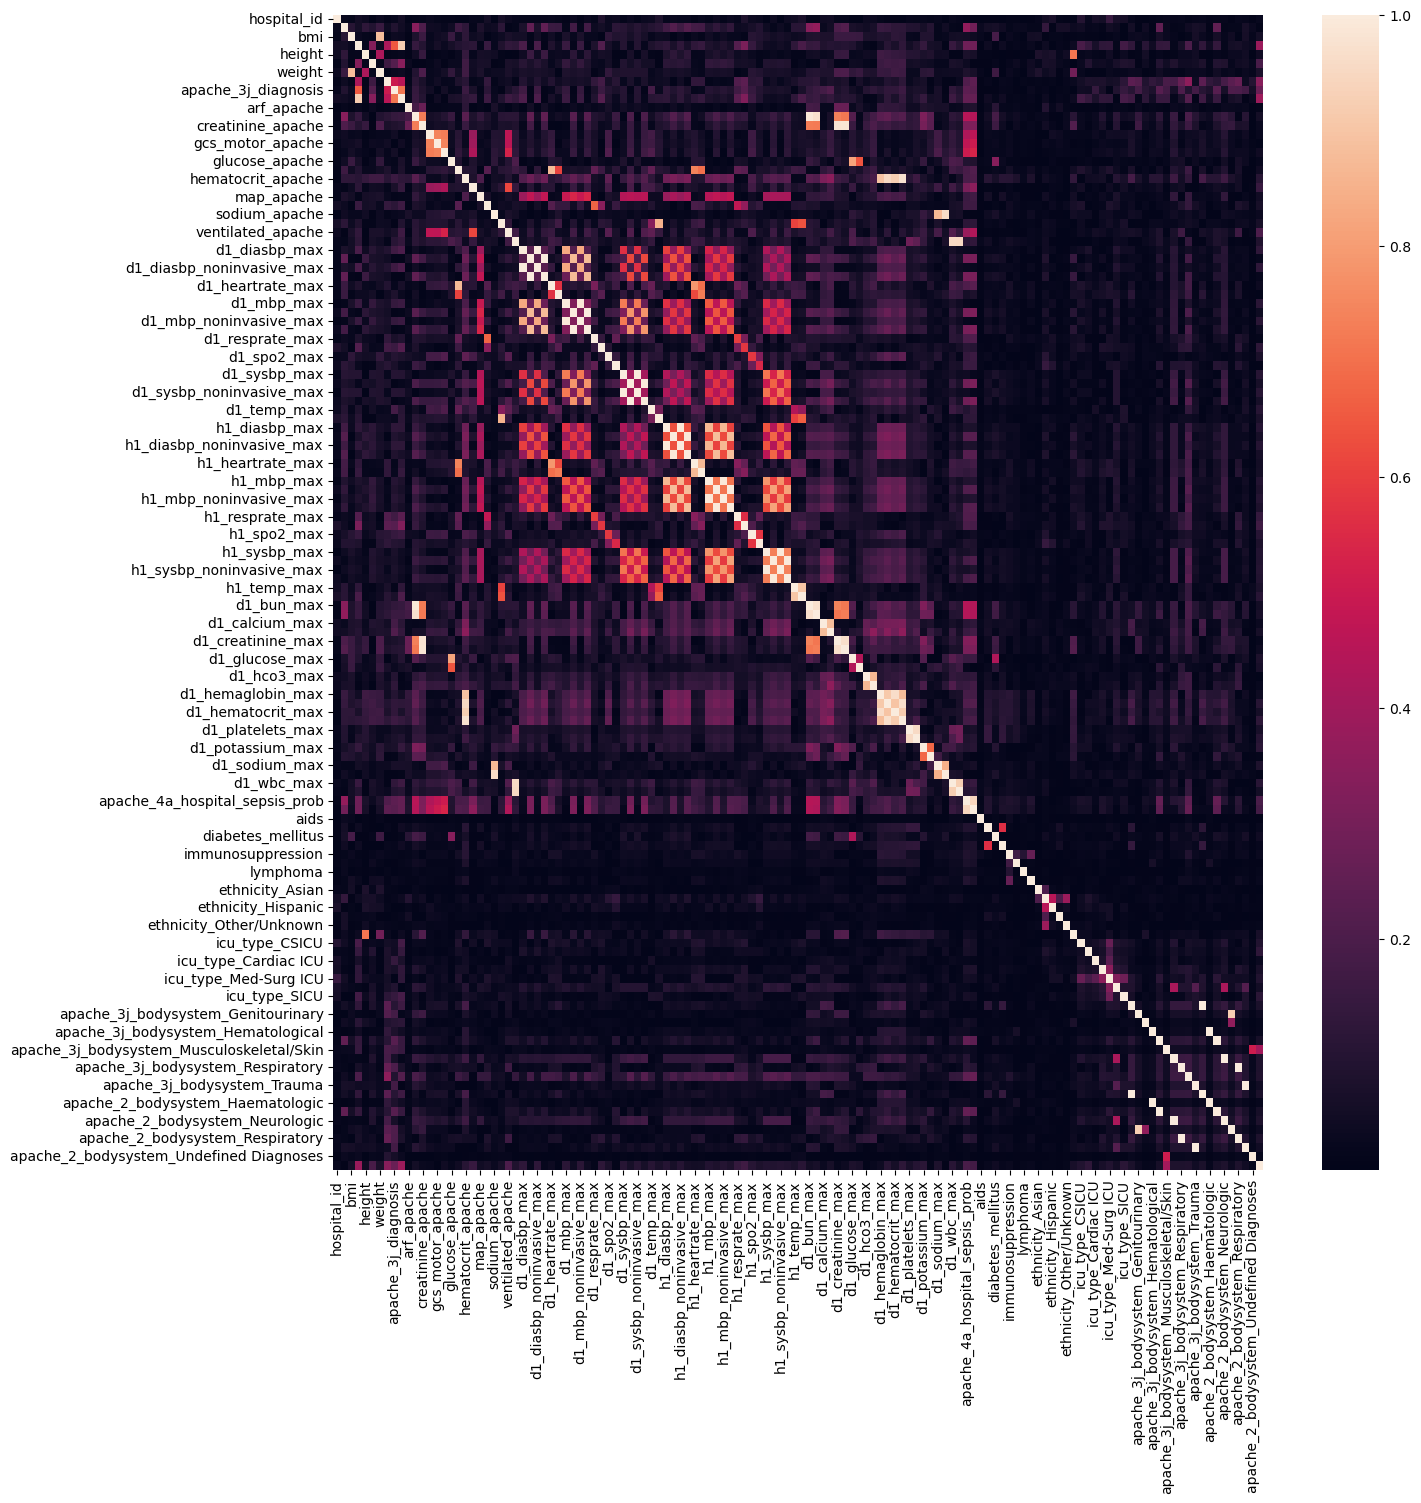

In [41]:
# lets find multi collinearity between the columns
plt.figure(figsize=(15,15))
sns.heatmap(x.corr(method="spearman").abs())
plt.show()

In [42]:
# import pandas as pd
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # Filter numeric columns
# x_numeric = x.select_dtypes(include=[float, int])

# # Calculate VIF for each column in x_numeric
# vif_data = pd.DataFrame()
# vif_data["feature"] = x_numeric.columns
# vif_data["VIF"] = [variance_inflation_factor(x_numeric.values, i) for i in range(x_numeric.shape[1])]

# # Combine VIF data with df if needed
# df = pd.concat([df, vif_data], axis=1)


In [43]:
df.head()

,hospital_id,septic_shock,age,bmi,elective_surgery,height,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_sepsis_prob,apache_4a_icu_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,118,0,68.0,22.730000,0,180.3,0.541667,0,73.9,113.0,502.01,0,0.0,31.0,2.51,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,36.0,134.0,39.3,0.0,14.1,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,39.5,37.5,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,81,0,77.0,27.420000,0,160.0,0.927778,0,70.2,108.0,203.01,0,0.0,9.0,0.56,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,33.0,145.0,35.1,1.0,12.7,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,36.3,36.3,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
5,83,0,67.0,27.560000,0,190.5,0.000694,0,100.0,301.0,403.01,0,0.0,13.0,0.71,4.0,6.0,0.0,5.0,156.0,113.0,44.2,0.0,130.0,35.0,137.0,36.6

In [44]:
corr_matrix=x.corr(method="spearman").abs()
corr_matrix.shape

(130, 130)

In [45]:
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
upper

,hospital_id,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_sepsis_prob,apache_4a_icu_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
hospital_id,NaN,0.023046,0.014703,0.049647,0.033495,0.000866,0.027434,0.005550,0.017585,0.047964,0.000385,0.008449,0.013198,0.026168,0.013921,0.009046,0.007863,0.001770,0.000898,0.016270,0.012759,0.054585,0.003439,0.059842,0.034473,0.019394,0.012832,0.015559,0.012855,0.015755,0.019620,0.014032,0.005818,0.030437,0.006060,0.030315,0.014507,0.083630,0.025829,0.033792,0.009972,0.029607,0.009554,0.029469,0.034897,0.080696,0.019332,0.025912,0.019883,0.022735,0.004763,0.022250,0.011027,0.032056,0.009597,0.030069,0.018210,0.079155,0.034078,0.026530,0.001634,0.038579,0.001074,0.038528,0.045206,0.068144,0.008044,0.009023,0.039987,0.046007,0.015116,0.013134,0.003566,0.003138,0.032027,0.030671,0.013144,0.007160,0.007119,0.002012,0.015735,0.014463,0.021034,0.011867,0.023314,0.002739,0.023601,0.018441,0.011255,0.001336,0.003196,0.007668,0.004331,0.002292,0.008219,0.009682,0.002801,0.007692,0.019434,0.048282,0.070106,0.008408,0.006511,0.010381,0.096917,0.019547,0.063454,0.054071,0.151043,0.066156,0.055449,0.022047,0.006083,0.002519,0.007910,0.012637,0.019986,0.018626,0.022033,0.011496,0.017696,0.022047,0.007910,0.012637,0.018626,0.006110,0.022033,0.017696,0.004668,0.020737
age,NaN,NaN,0.102192,0.054517,0.123064,0.090182,0.148448,0.035333,0.088868,0.045835,0.019419,0.341147,0.206540,0.042142,0.035899,0.021180,0.045058,0.161223,0.121132,0.008750,0.076555,0.031430,0.042749,0.113531,0.006724,0.011917,0.073898,0.251466,0.073416,0.251180,0.154576,0.151041,0.014250,0.172263,0.014217,0.172481,0.031633,0.051329,0.029938,0.113899,0.104631,0.075637,0.104315,0.075678,0

In [46]:
high_corr=[col for col in upper.columns if any(upper[col]>=0.9)]

In [47]:
high_corr

['apache_post_operative',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasive_min',
 'h1_sysbp_noninvasive_max',
 'h1_sysbp_noninvasive_min',
 'd1_bun_max',
 'd1_bun_min',
 'd1_creatinine_max',
 'd1_creatinine_min',
 'd1_hemaglobin_min',
 'd1_hematocrit_max',
 'd1_hematocrit_min',
 'd1_platelets_min',
 'd1_sodium_min',
 'd1_wbc_max',
 'd1_wbc_min',
 'apache_4a_icu_sepsis_prob',
 'apache_2_bodysystem_Gastrointestinal',
 'apache_2_bodysystem_Haematologic',
 'apache_2_bodysystem_Metabolic',
 'apache_2_bodysystem_Neurologic',
 'apache_2_bodysystem_Renal/Genitourinary',
 'apache_2_bodysystem_Respiratory',
 'apache_2_bodysystem_Trauma']

In [48]:
len(high_corr)

32

In [49]:
x1= x.drop(high_corr, axis=1)

In [50]:
x1.head()

,hospital_id,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_temp_max,h1_temp_min,d1_calcium_max,d1_calcium_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_platelets_max,d1_potassium_max,d1_potassium_min,d1_sodium_max,apache_4a_hospital_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,118,68.0,22.730000,0,180.3,0.541667,73.9,113.0,502.01,0.0,31.0,2.51,3.0,6.0,4.0,168.0,118.0,27.4,0.0,40.0,36.0,134.0,39.3,0.0,14.1,68.0,37.0,119.0,72.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,39.9,37.2,68.0,63.0,119.0,108.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,39.5,37.5,8.5,7.4,168.0,109.0,19.0,15.0,8.9,233.0,4.0,3.4,136.0,0.10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,81,77.0,27.420000,0,160.0,0.927778,70.2,108.0,203.01,0.0,9.0,0.56,1.0,3.0,1.0,145.0,120.0,36.9,0.0,46.0,33.0,145.0,35.1,1.0,12.7,95.0,31.0,118.0,72.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,36.3,35.1,61.0,48.0,114.0,100.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,36.3,36.3,8.6,8.0,145.0,128.0,27.0,26.0,11.3,557.0,4.2,3.8,145.0,0.47,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
5,83,67.0,27.560000,0,190.5,0.000694,100.0,301.0,403.01,0.0,13.0,0.71,4.0,6.0,5.0,156.0,113.0,44.2,0.0,130.0,35.0,137.0,36.6,0.0,10.9,100.0,61.0,113.0,83.0,127.0,80.0,32.0,10.0,97.0,91.0,173.0,107.0,36.8,36.6,89.0,89.0,83.0,83.0,111.0,111.0,12.0,12.0,97.0,97.0,143.0,143.0,36.7,36.7,8.8,8.8,156.0,125.0,27.0,27.0,15.6,159.0,3.9,3.7,137.0,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
17,118,46.0,25.845717,0,167.6,0.000000,72.6,108.0,203.01,0.0,15.0,1.00,1.0,4.0,1.0,143.0,114.0,44.2,1.0,113.0,34.0,132.0,36.4,1.0,9.7,89.0,61.0,98.0,64.0,113.0,76.0,22.0,9.0,100.0,88.0,169.0,102.0,37.1,36.4,89.0,63.0,94.0,80.0,104.0,88.0,21.0,9.0,99.0,95.0,169.0,115.0,36.6,36.6,8.5,8.5,143.0,143.0,27.0,27.0,15.0,247.0,4.9,4.9,132.0,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
23,118,87.0,21.963763,0,180.3,5.046528,71.4,113.0,501.05,0.0,13.0,0.94,3.0,6.0,1.0,105.0,99.0,28.9,0.0,133.0,33.0,146.0,36.3,1.0,9.9,88.0,65.0,116.0,74.0,123.0,90.0,36.0,16.0,100.0,90.0,179.0,129.0,36.8,35.6,71.0,65.0,116.0,92.0,102.0,

In [51]:
x1.shape

(27795, 98)

In [58]:
import scipy.stats as st
from scipy.stats import norm
# st.norm.interval(alpha=0.95, loc=np.mean(x1['age']),scale=st.sem(x1['age']))
norm.interval(0.95,loc=np.mean(x1["age"]),scale=st.sem(x1["age"]))

(62.471691549087915, 62.85962703339094)

1.14.1
